# Cyclistic Case Study

This case study was completed as part of the capstone project for the Google Data Analytics Professional Certificate.
I used the six phases of the data analysis process: Ask, Prepare, Process, Analyze, Share, Act, to complete the business task of the assignment. The data was compiled, cleaned, and analyzed first via SQL Google Cloud's BigQuery. Then, pertinent data was exported to [Tableau](https://public.tableau.com/app/profile/sohan.manchireddy/viz/CyclisticCaseStudy_16929939095130/CyclisticCaseStudy) 
for data visualization.

### Scenario

You are a junior data analyst working in the marketing analyst team at Cyclistic, a bike-share company in Chicago. The director of marketing believes the company’s future success depends on maximizing the number of annual memberships. Therefore, your team wants to understand how casual riders and annual members use Cyclistic bikes differently. From these insights, your team will design a new marketing strategy to convert casual riders into annual members. But first, Cyclistic executives must approve your recommendations, so they must be backed up with compelling data insights and professional data visualizations.

#### Business Task: 


How do annual members and casual riders use Cylclistic bikes differently?

#### Overall Business Goal: 

Design marketing strategies to convert casual riders into annual members.

### About the Company

In 2016, Cyclistic launched a successful bike-share offering. Since then, the program has grown to a fleet of 5,824 bicycles 
that are geotracked and locked into a network of 692 stations across Chicago. The bikes can be unlocked from one station and 
returned to any other station in the system anytime. 

Until now, Cyclistic’s marketing strategy relied on building general awareness and appealing to broad consumer segments. One 
approach that helped make these things possible was the flexibility of its pricing plans: single-ride passes, full-day passes, 
and annual memberships. Customers who purchase single-ride or full-day passes are referred to as casual riders. Customers who 
purchase annual memberships are Cyclistic members.	

Cyclistic’s finance analysts have concluded that annual members are much more profitable than casual riders. Although the 
pricing flexibility helps Cyclistic attract more customers, Moreno believes that maximizing the number of annual members will 
be key to future growth. Rather than creating a marketing campaign that targets all-new customers, Moreno believes there is a 
very good chance to convert casual riders into members. She notes that casual riders are already aware of the Cyclistic program 
and have chosen Cyclistic for their mobility needs.

#### Proposed Deliverables:
1. A clear statement of the business task 
2. A description of all data sources used 
3. Documentation of any cleaning or manipulation of data 
4. A summary of your analysis 
5. Supporting visualizations and key findings 
6. Your top three recommendations based on your analysis


## Ask Phase

#### Business Tasks:

1. How do annual members and casual riders use Cylclistic bikes differently?”
2. Why would casual riders buy Cyclistic annual memberships?
3. How can Cyclistic use digital media to influence casual riders to become members?

We have been tasked with answering the first question for this assignment.

Proposed below are a few questions to answer the business task set by the marketing director and the executive team.

* How do annual members and casual riders compare in trip duration per recorded usage?
* Does time-of-day and/or day-of-the-week affect bike usage for each rider type?
* What stations or areas see the most bike usage for each rider type?
* Do members and/or casual riders use one bike type predominantly over others?

## Prepare Phase

We were given access to 12 months of first-party historical data from 2022-07 to 2023-06 via the [DIVVY datasets](https://divvy-tripdata.s3.amazonaws.com/index.html)

_Does the data ROCCC?_
* Reliable - Accurate, complete, unbiased 
* Original - First-party data
* Comprehensive - Over five million records with 13 pertinent fields
* Current - Most recent 12 month period as of this study
* Cited - Made available via Motivate International Inc (fictional) via [DIVVY Data License Aggreement](https://ride.divvybikes.com/data-license-agreement)

The License's data-privacy prohibits using riders' personal identification information.

The datasets were uploaded to a bucket in Google Cloud before querying via BigQuery

* 12 separate .csv files for each month
* Each file has the same fields and data types

#### Used <UNION ALL> to stack all datasets into one dataset

SELECT * FROM `cyclistic-395223.trips.2022_07_tripdata` UNION ALL
    
SELECT * FROM `cyclistic-395223.trips.2022_08_tripdata` UNION ALL
    
SELECT * FROM `cyclistic-395223.trips.2022_09_tripdata` UNION ALL
    
SELECT * FROM `cyclistic-395223.trips.2022_10_tripdata` UNION ALL
    
SELECT * FROM `cyclistic-395223.trips.2022_11_tripdata` UNION ALL
    
SELECT * FROM `cyclistic-395223.trips.2022_12_tripdata` UNION ALL
    
SELECT * FROM `cyclistic-395223.trips.2023_01_tripdata` UNION ALL
    
SELECT * FROM `cyclistic-395223.trips.2023_02_tripdata` UNION ALL
    
SELECT * FROM `cyclistic-395223.trips.2023_03_tripdata` UNION ALL
    
SELECT * FROM `cyclistic-395223.trips.2023_04_tripdata` UNION ALL
    
SELECT * FROM `cyclistic-395223.trips.2023_05_tripdata` UNION ALL
    
SELECT * FROM `cyclistic-395223.trips.2023_06_tripdata`;
    
* Total Starting rows: 5,799,444

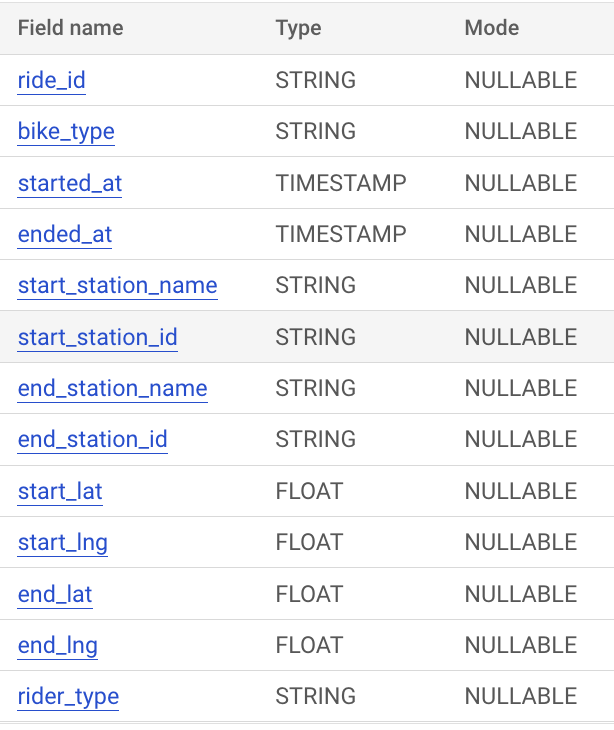


## Process Phase

##### 1) Check for distinct rider types

SELECT DISTINCT member_casual

FROM `cyclistic-395223.trips.12_month_tripdata`;

* member
* casual

##### 2) Check for distinct bike types

SELECT DISTINCT rideable_type

FROM `cyclistic-395223.trips.12_month_tripdata`;

* electric
* docked
* classic

##### 3) Check for NULLS in desired columns

SELECT {field}

FROM `cyclistic-395223.trips.12_month_tripdata`
    
WHERE {field} IS NULL;

Desired fields to check
* ride_id
* rideable_type
* started_at
* ended_at
* member_casual

##### 4) Change column names to logical names

ALTER TABLE `cyclistic-395223.trips.12_month_tripdata`
    
RENAME COLUMN member_casual to rider_type;
    
AND
    
ALTER TABLE `cyclistic-395223.trips.12_month_tripdata`
    
RENAME COLUMN rideable_type to bike_type;
    
##### 5) Remove abnormal records

* When start_at is later than end_at
* When either start_lat or end_lat is >0
* When either start_lng or end_lng is <0

##### 6) Added a new column to calculate trip duration in seconds (trip_duration_sec)

SELECT *,

TIMESTAMP_DIFF(ended_at,started_at,second) AS trip_duration_sec

FROM `cyclistic-395223.trips.12_month_tripdata`

WHERE started_at < ended_at
AND start_lat > 0

AND end_lat > 0

AND start_lng < 0

AND end_lng < 0

Steps 5 & 6 were done with one query.

Saved the results as a new dataset labeled (12_month_tripdata_clean)

Total records after "cleaning" - 5,773,065



## Analyze Phase

The goal of this phase is to answer the questions proposed in the Ask stage.

Each specified field was compared and contrasted to rider type to answer business task.

##### 1) Number of rides per Rider type

SELECT rider_type,

COUNT(rider_type) AS num_of_rides

FROM `cyclistic-395223.trips.12_month_tripdata_clean`

GROUP BY rider_type

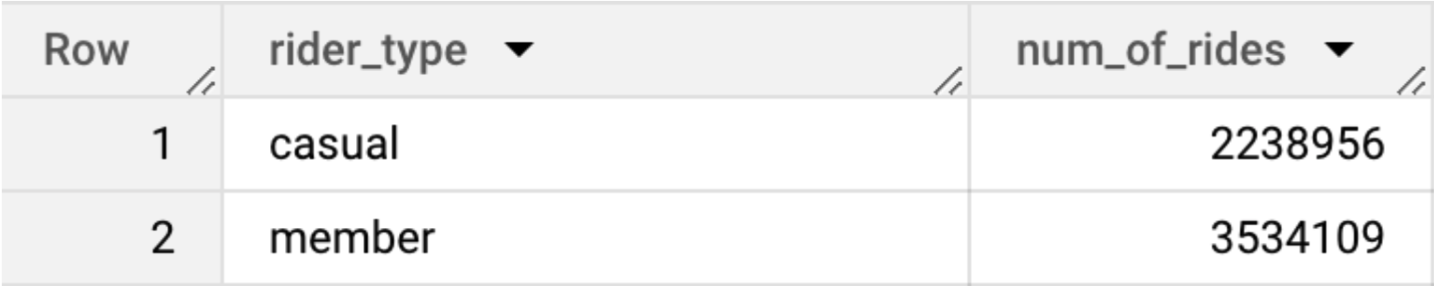

* Members accounted for approximately 61% of total number of rides

##### 2) Average trip duration by Rider type

SELECT rider_type,

AVG(trip_duration_sec) AS avg_trip_duration_sec

FROM `cyclistic-395223.trips.12_month_tripdata_clean`

GROUP BY rider_type

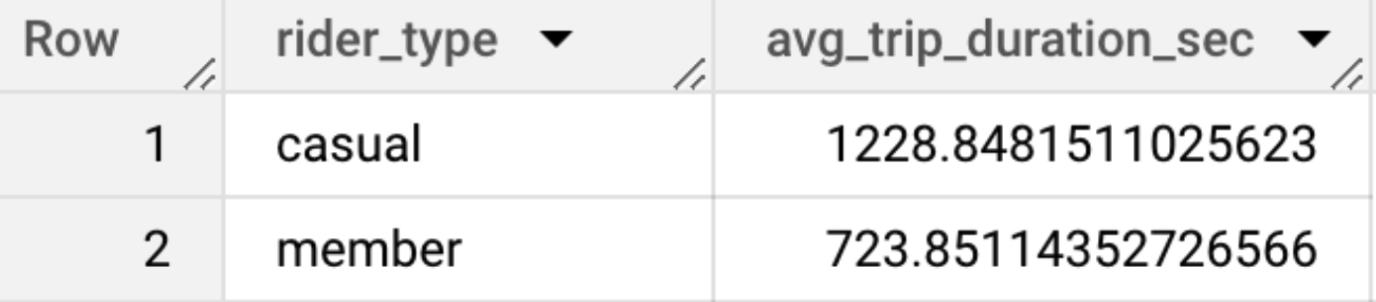

* Casual riders average for longer trips

##### 3) Number of rides by Rider type per Bike type

SELECT bike_type, rider_type,

COUNT(*) AS num_of_rides

FROM `cyclistic-395223.trips.12_month_tripdata_clean`

WHERE rider_type IN ('casual', 'member')

GROUP BY bike_type, rider_type

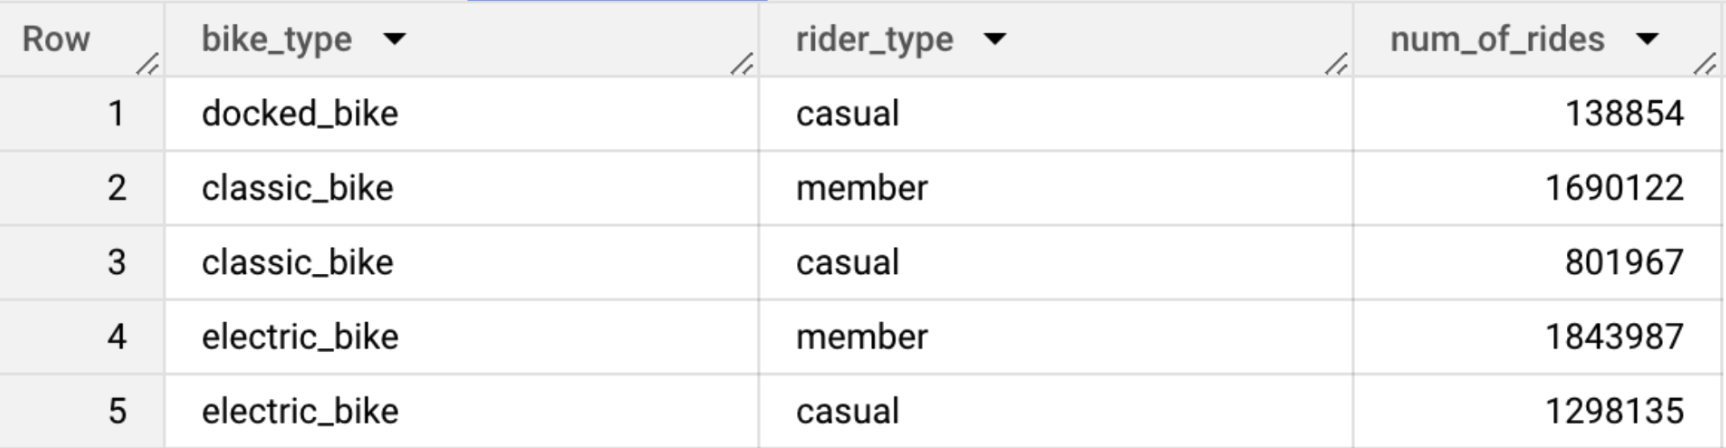

* Member rode docked bikes 0 times
* Most preferred type for each rider type was the electric bike

##### 4) Day-of-the-week by Rider Type

* First I converted started_at TIMESTAMP to a string with the day of the week.

SELECT ride_id,bike_type,started_at,

FORMAT_TIMESTAMP("%A", TIMESTAMP(started_at)) AS start_day_of_week,

ended_at,trip_duration_sec,rider_type

FROM `cyclistic-395223.trips.12_month_tripdata_clean`

* I saved this as a new table (12_month_tripdata_clean_2) to then calculate the count for each day of week by rider type

SELECT rider_type,start_day_of_week,

COUNT(*) AS count_day_of_week

FROM `cyclistic-395223.trips.12_month_data_clean_2`

WHERE start_day_of_week IN 

    ('Monday','Tuesday','Wednesday','Thursday','Friday','Saturday', 'Sunday')
    
GROUP BY start_day_of_week, rider_type

ORDER BY count_day_of_week DESC, rider_type

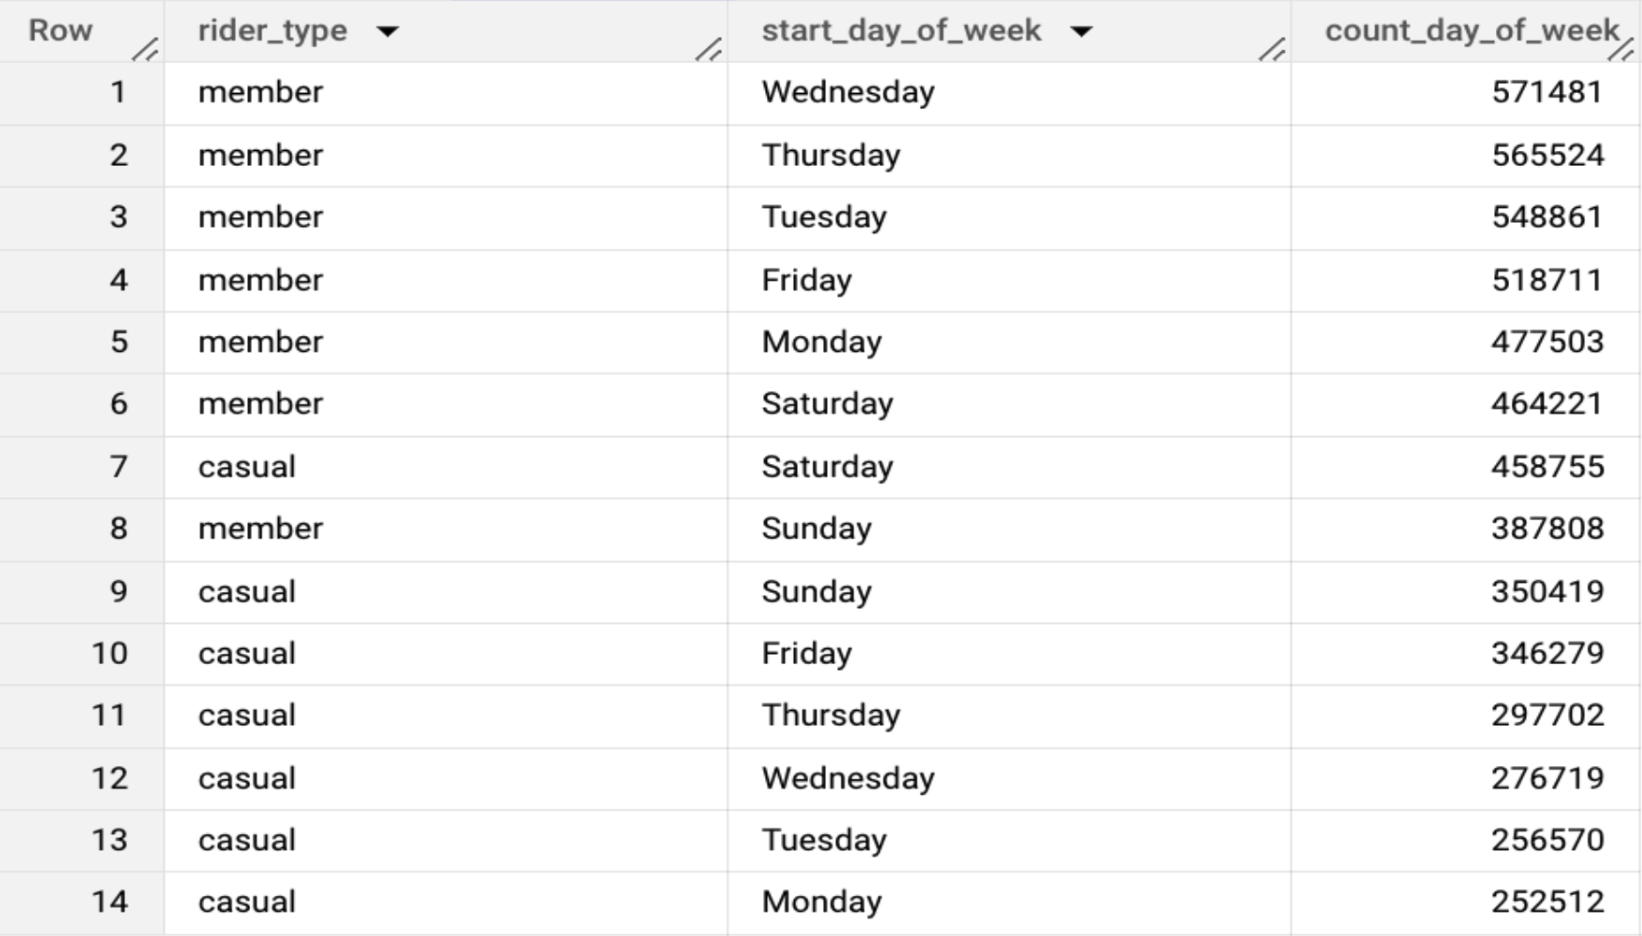

* Members had higher use during weekdays
* Casual riders had higher use during the weekend

##### 5) Start Station count by Rider type

SELECT start_station_name, rider_type,

COUNT(*) AS count_start_station

FROM `cyclistic-395223.trips.12_month_tripdata_clean`

GROUP BY start_station_name,rider_type

ORDER BY count_start_station DESC, start_station_name

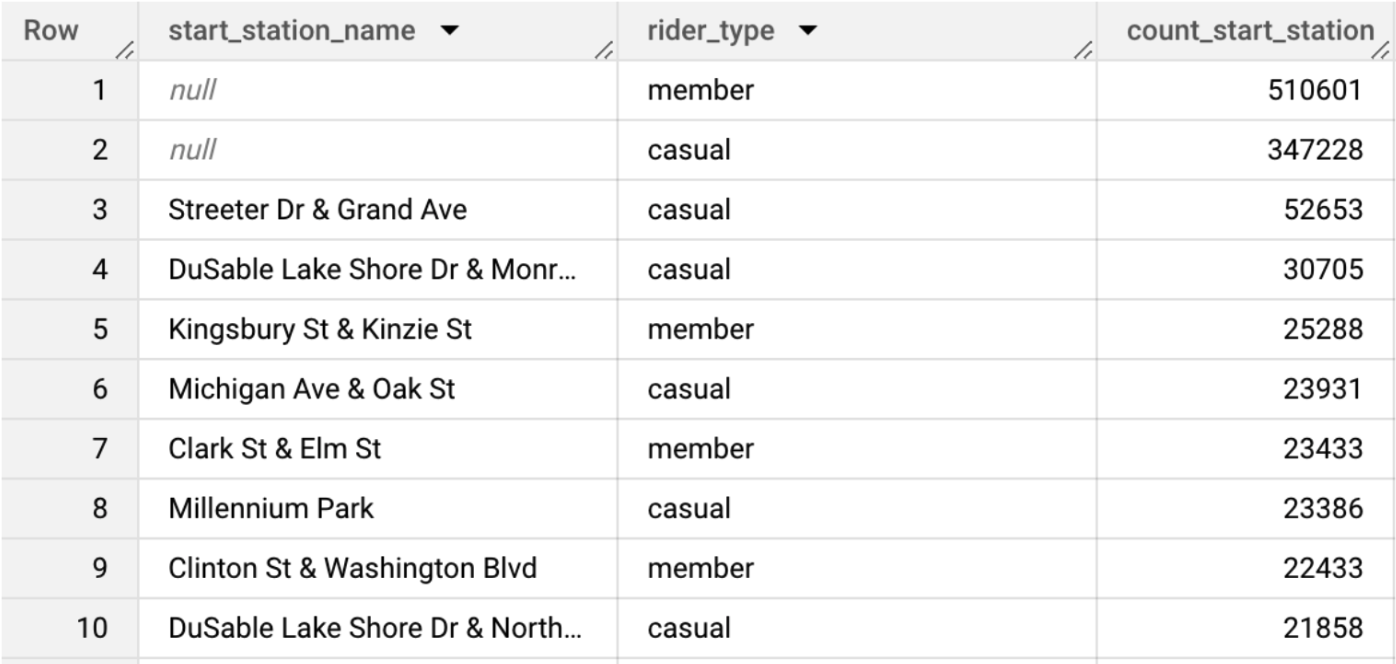

* Increased limitation in analysis due to large number of NULLS
* Top two proportionally larger station counts are by casual riders

##### 6) Start time-of-day by Rider type

1. First I changed start_at TIMESTAMP to 24 hour scale (1-24)

SELECT ride_id, started_at,

FORMAT_TIMESTAMP("%k", TIMESTAMP(started_at)) AS start_time_of_day,

ended_at, trip_duration_sec, bike_type, rider_type

FROM `cyclistic-395223.trips.12_month_tripdata_clean`

* I saved this as a new table (12_month_data_clean)

2. Start_time_of_day was a string, so I CAST it as an integer

SELECT *,

CAST(start_time_of_day AS INT64) AS start_time_of_day_int

FROM `cyclistic-395223.trips.12_month_data_clean_3`

3. The integers were categorized into five sections

* Early Morning  03:01 - 07:00 (> 3 AND <= 7)

* Morning        07:01 - 12:00 (> 7 AND <= 12)

* Afternoon      12:01 - 17:00 (> 12 AND <= 17)

* Evening        17:01 - 22:00 (> 17 AND <= 22)

* Late Night     22:01 - 03:00 (> 22 OR <= 3)

SELECT *,

CASE

WHEN start_time_of_day_int > 3 AND start_time_of_day_int <= 7 THEN 'Early Morning'

WHEN start_time_of_day_int > 7 AND start_time_of_day_int <= 12 THEN 'Morning'

WHEN start_time_of_day_int > 12 AND start_time_of_day_int <= 17 THEN 'Afternoon'

WHEN start_time_of_day_int > 17 AND start_time_of_day_int <= 22 THEN 'Evening'

WHEN start_time_of_day_int > 22 OR start_time_of_day_int <= 3 THEN 'Late Night'

ELSE NULL

END AS start_time_of_day

FROM `cyclistic-395223.trips.start_time_of_day_as_int`

* I saved the results as a new table (12_month_data_clean_3) and then used INNER JOIN aggregate tables with new column into a table (tripdata_clean)

4. Now, start time-of-day by Rider type can be analyzed

SELECT rider_type,start_time_of_day,

COUNT(*) AS count_time_of_day

FROM `cyclistic-395223.trips.tripdata_clean`

WHERE start_time_of_day IN ('Early Morning','Morning','Afternoon','Evening','Late Night')

GROUP BY start_time_of_day, rider_type

ORDER BY rider_type DESC, count_time_of_day DESC

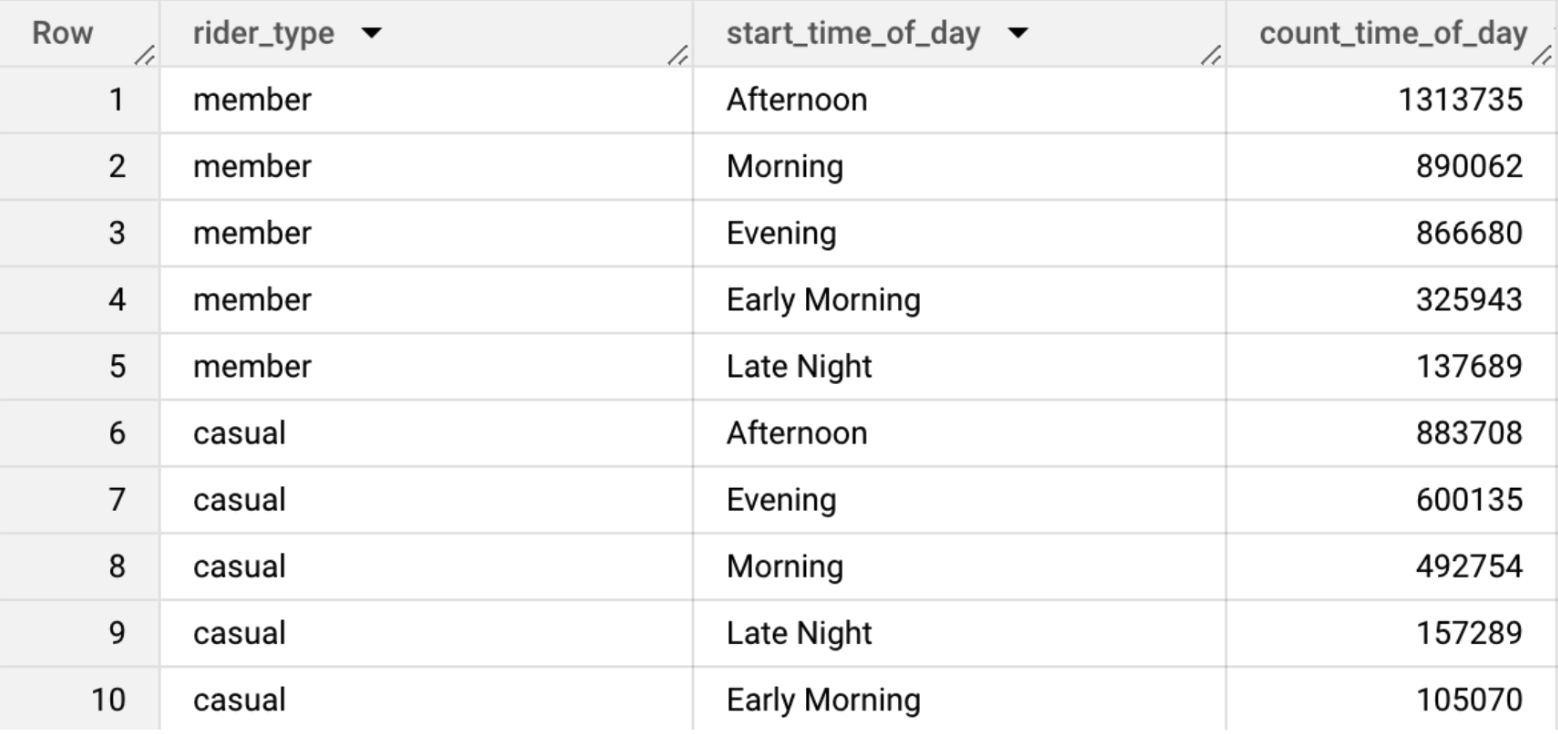

* Both rider types had the highest preference for the "Afternoon"

##### 7) Geographical location by Rider type

This analysis was done in Tableau using the symbol map functionality.


## Share Phase

Data visualizations were done on [Tableau](https://public.tableau.com/app/profile/sohan.manchireddy/viz/CyclisticCaseStudy_16929939095130/CyclisticCaseStudy)

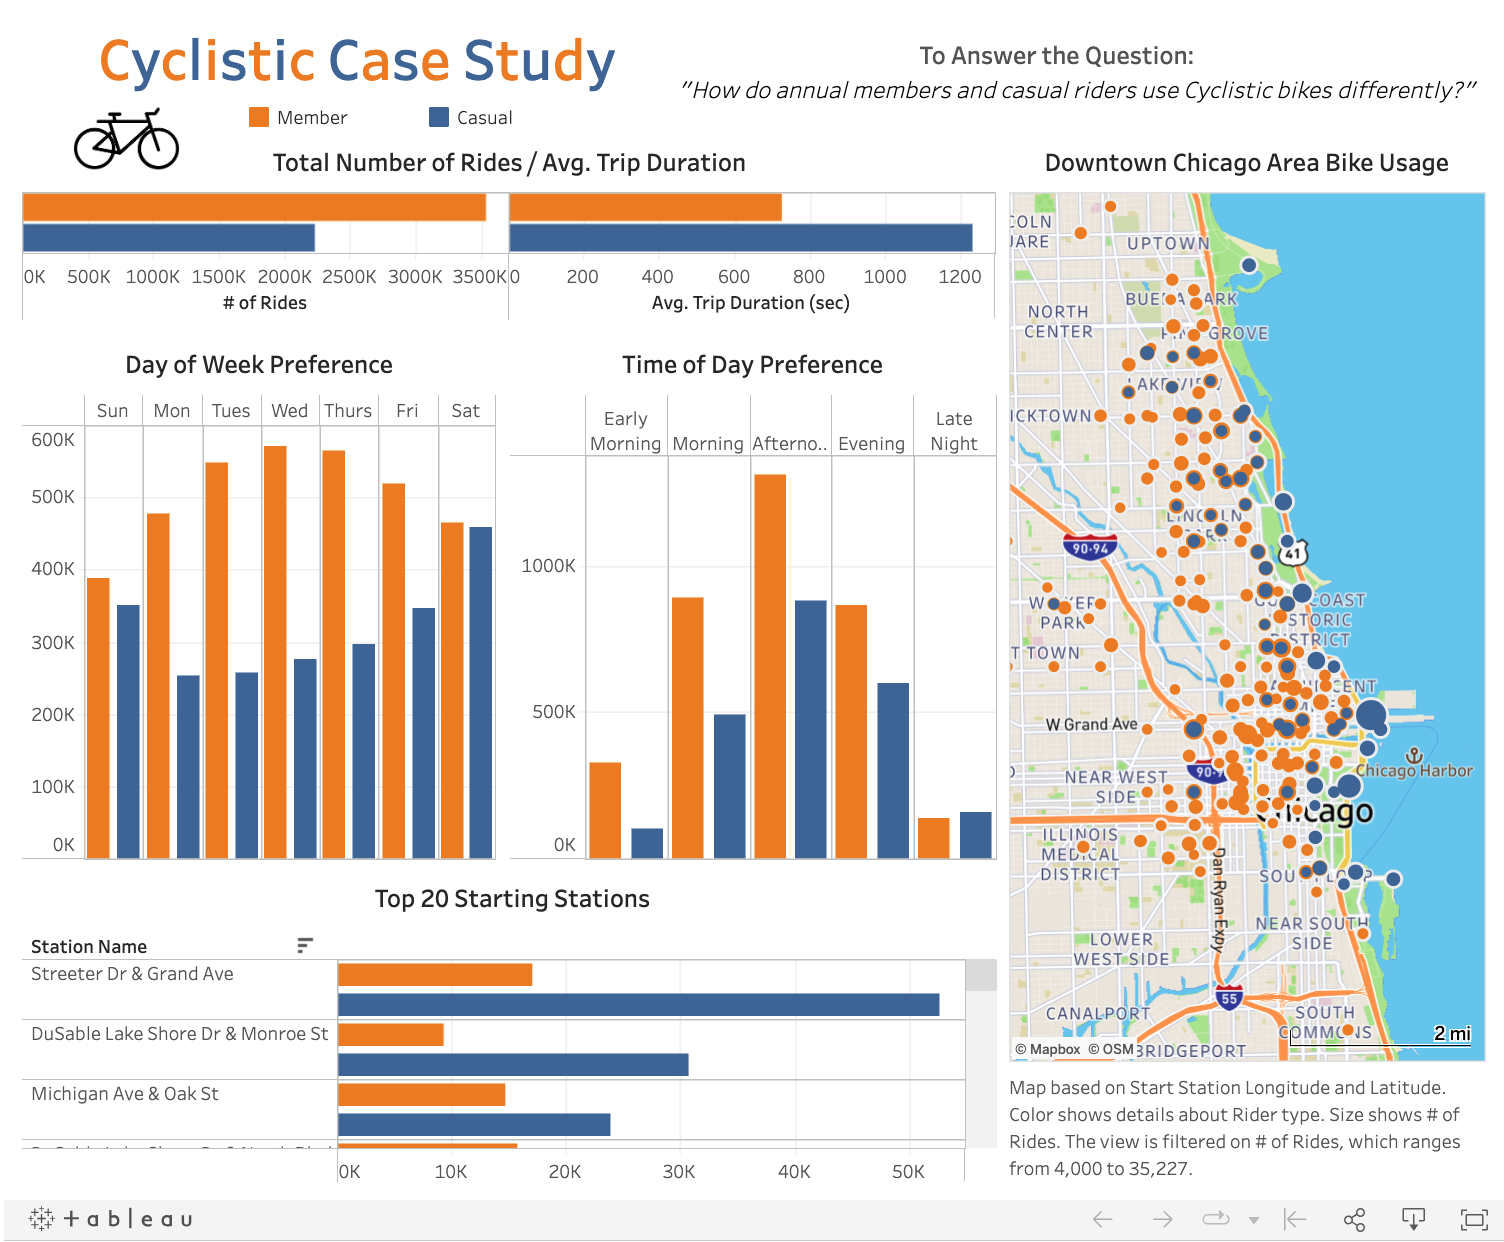

## Conclusion

#### Some limitations

* Data-privacy prohibitions limit using personal identification information, such as age, gender, and work status, for analysis and targeted marketing.
* Significantly high number of NULLS in start_station_name hinder reliability of that field for analysis.
* Length of membership or usage as a casual rider not included as field.

#### Discoveries in the Data

* Members account for nearly 61& of total number of rides, but average lower ride durations than Casual riders.
* Day-of-week analysis revealed a greater number of rides for members during the week and for casual riders during the weekend.
* Both members and casual riders had the highest preference for the Afternoon.
* Some of the most popular stations, established by number of rides, were frequented in majority by casual riders.
* Geographical data demonstrated casual riders' preference for coast-line stations and members' preference for more inland stations.

#### Data-driven Recommendations

Promote memberships for casual riders during their peak usage. This would be during weekends and primarily in the afternoon. 
* Offer discounts for weekend use as a new member for a limited number of time.

Since casual riders average longer ride durations, demonstrate cost effectiveness of a membership for longer trips. 
* Offer a marginal discount for long-distance members such as a decreased cost per minute for trips over a threshold.

Most popular stations for casual riders is along the coast. Host a coast-side event promoting/ incentivizing membership purchases. Additionally increase targeted promotion, in general, to these coast-side stations. 
* Offer a bring-a-friend membership promotion where both users get an alloted number of free rides.

#### Next Steps

* Compare time-of-year usage to rider type to establish pattern between months or seasons 
* Any personal identify information would allow for more targeted marketing
* Find out why there are so many NULLS in station names and solve that problem
